<a href="https://colab.research.google.com/github/lima-breno/data_wrangling/blob/main/DW_10_4_PANDAS_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Parte 1

Você recebeu a tarefa de normalizar o seguinte arquivo JSON chamado “informacoes.json” referente a algumas informações de identificação de um cliente.


In [ ]:
import pandas as pd

In [ ]:
dados_brutos = pd.read_json('/content/drive/MyDrive/Colab Notebooks/12. Pandas - Limpeza e tratamento de dados/Dados utilizados/informacoes.json')
dados_brutos

,nome,idade,enderecos
0,João,28,"{'tipo': 'casa', 'rua': 'Rua A', 'numero': 123..."
1,João,28,"{'tipo': 'trabalho', 'rua': 'Rua B', 'numero':..."


In [ ]:
# tem um objeto json na coluna enderecos, precisa ser feita normalização
pd.json_normalize(dados_brutos['enderecos']).head()

,tipo,rua,numero,cidade
0,casa,Rua A,123,São Paulo
1,trabalho,Rua B,456,Rio de Janeiro


In [ ]:
# Para realizar a normalização precisa-se importar a biblioteca json e carregar o arquivo como objeto python

import json

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/12. Pandas - Limpeza e tratamento de dados/Dados utilizados/informacoes.json') as f:
  json_bruto = json.load(f)
json_bruto

{'nome': 'João',
 'idade': 28,
 'enderecos': [{'tipo': 'casa',
   'rua': 'Rua A',
   'numero': 123,
   'cidade': 'São Paulo'},
  {'tipo': 'trabalho',
   'rua': 'Rua B',
   'numero': 456,
   'cidade': 'Rio de Janeiro'}]}

In [ ]:
# Agora vamos normalizar os dados de endereço
info = pd.json_normalize(json_bruto,record_path='enderecos', meta=['nome', 'idade'])
info.head()

,tipo,rua,numero,cidade,nome,idade
0,casa,Rua A,123,São Paulo,João,28
1,trabalho,Rua B,456,Rio de Janeiro,João,28


In [ ]:
# EXPLICAÇÃO
##Neste passo estamos usando o método json_normalize para normalizar os dados de endereço do objeto JSON json_bruto.
###O parâmetro record_path é usado para especificar o caminho para os dados que queremos normalizar.
#### No nosso caso, queremos normalizar os dados da lista de endereços, então especificamos 'enderecos'.

#O parâmetro meta é usado para especificar quais chaves do objeto original queremos incluir na saída normalizada.
#No nosso caso, queremos incluir as chaves 'nome' e 'idade' do objeto original.

#Resumindo,
### record_path define qual caminho deve ser seguido para obter os dados que serão normalizados,
### meta define quais outras chaves devem ser incluídas na tabela normalizada.
### A variável ’info’ contém os dados que foram normalizados em uma tabela na qual cada linha representa um endereço. As colunas representam os atributos dos endereços,
##bem como as chaves nome e idade do objeto original.

# Desafio Part 2


Sua tarefa é realizar alguns tratamentos e deixar esse arquivo JSON como um Pandas DataFrame, sem dados vazios e com a tipagem das colunas de forma correta. Como isso pode ser feito?



In [ ]:
# Primeiro passo é abrir e carregar o conteudo do JSON em um objeto python

import json

with open('/content/drive/MyDrive/Colab Notebooks/12. Pandas - Limpeza e tratamento de dados/Dados utilizados/dados.json','r') as f:
  dados = json.load(f)
dados

{'pessoas': [{'nome': 'João',
   'idade': '25',
   'endereco': {'rua': 'Rua A', 'numero': 123, 'cidade': 'São Paulo'},
   'telefones': ['11 1111-1111', '11 2222-2222']},
  {'nome': 'Maria',
   'idade': 30,
   'endereco': {'rua': '', 'numero': 456, 'cidade': 'Rio de Janeiro'},
   'telefones': ['21 3333-3333']}]}

In [ ]:
# NOrmalizar o JSON com o método json_normalize

# esse método é utilizado para "achatar" um objeto JSON, ou seja, transformá-lo em um formato de tabela relacional.
# No exemplo, é uma lista de pessoas, cada uma com seus respectivos atributos. Normalizando:

import pandas as pd

df = pd.json_normalize(dados, record_path=['pessoas'])

Fazendo o cast das colunas para suas tipagens corretas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 224.0+ bytes


In [ ]:
# A coluna idade está como tipo objeto. Porém, essa coluna tem somente dois valores que são inteiros
  # e que faz sentido com a informação que ela carrega. Vamos entao fazer o cast dessa cooluna para o tipo inteiro

df['idade'] = df['idade'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      int64 
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(2), object(4)
memory usage: 224.0+ bytes


In [ ]:
# A idade passou para tipo int64! o/


Realizando o filtro e remoção dos dados com valores vazios

In [ ]:
# O conjunto de dados que a coluna "endereco.rua" possui um valor em branco.
# vamos realizar um filtro para as amostras que possuem um valor diferente de vazio
# nessa coluna e salvar em outro Pandas DataFrame


In [ ]:
df_filtrado = df.query('`endereco.rua` != ""')
df_filtrado

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo


In [ ]:
# o endereco.rua deve estar em crase pra que pandas possa interpreta-lo corretamente como uma coluna com noome
    # contendo pontos. Além disso, utilizamos o operador de comparação != para selecionar as linhas
    # que NAO possuem valor vazio na coluna "endereco.rua". Por fim, o resultado é armaenado eo df_filtrado

##Desafio Part 3


Para facilitar a análise dos dados de cadastro de cursos de uma plataforma, você recebeu um arquivo chamado cursos_cadastrados.json. Você foi informado que esses dados podem apresentar problemas que podem prejudicar a análise e interpretação correta dos dados.
Para resolver isso, foi solicitado que você identifique e remova as amostras que apresentam os seguintes problemas:

- Valores nulos: são valores ausentes em algumas das colunas que devem ser preenchidos para que a análise seja correta.
- Duplicatas: registros iguais que podem prejudicar a análise dos dados, já que estão representando a mesma informação.
- Strings vazias: valores de texto que não apresentam nenhum conteúdo escrito, o que pode dificultar a análise de dados, principalmente se a coluna tiver muitos valores assim.
- Conversão de tipos: algumas colunas do arquivo podem estar no tipo de dados errado, como texto em vez de número, o que pode prejudicar a análise. Nesse caso você deve realizar a conversão para o tipo correto de cada coluna.


Dentro desse contexto, você precisará de uma abordagem sistemática para limpar os dados. Assim, como isso pode ser feito?

In [ ]:
import json

with open('/content/drive/MyDrive/Colab Notebooks/12. Pandas - Limpeza e tratamento de dados/Dados utilizados/cursos_cadastrados.json','r') as f:
  cursos = json.load(f)
cursos

[{'curso': 'Introdução à programação',
  'categoria': 'Programação',
  'carga_horaria': '20 horas',
  'concluintes': 100,
  'data_inicio': '2022-01-01',
  'data_conclusao': '2022-01-20',
  'descricao': 'Curso introdutório à programação com Python',
  'preco': '99.90',
  'instrutor': {'nome': 'João Silva',
   'email': 'joao.silva@emailaleatorio.com',
   'telefone': '(11) 9999-9999'}},
 {'curso': 'Excel para iniciantes',
  'categoria': 'Produtividade',
  'carga_horaria': None,
  'concluintes': None,
  'data_inicio': None,
  'data_conclusao': None,
  'descricao': None,
  'preco': None,
  'instrutor': {'nome': 'Maria Oliveira',
   'email': 'maria.oliveira@emailaleatorio.com',
   'telefone': '(11) 8888-8888'}},
 {'curso': 'Marketing digital para negócios',
  'categoria': 'Marketing',
  'carga_horaria': '30 horas',
  'concluintes': 75,
  'data_inicio': '2022-03-01',
  'data_conclusao': '2022-03-31',
  'descricao': 'Curso introdutório em marketing',
  'preco': 89.9,
  'instrutor': {'nome': 'A

In [ ]:
import pandas as pd

cursos_normalizado = pd.json_normalize(cursos)
cursos_normalizado.head()

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,


In [ ]:
cursos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               6 non-null      object
 1   categoria           6 non-null      object
 2   carga_horaria       5 non-null      object
 3   concluintes         5 non-null      object
 4   data_inicio         5 non-null      object
 5   data_conclusao      5 non-null      object
 6   descricao           5 non-null      object
 7   preco               5 non-null      object
 8   instrutor.nome      6 non-null      object
 9   instrutor.email     6 non-null      object
 10  instrutor.telefone  6 non-null      object
dtypes: object(11)
memory usage: 656.0+ bytes


Ajustando as colunas em branco

In [ ]:
# APLICANDO A MODIFICAÇÃO DE COLUNA (CAST)

# Verificando as colunas que estão com valores nulos

cursos_normalizado.isnull().sum().sum()

6

In [ ]:
# Verificamos que existem 6 colunas que tem uma quantidade de valores nulos

# Para verificar quais amostras são essas:

cursos_normalizado[cursos_normalizado.isna().any(axis=1)]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888


In [ ]:
# o código acima é utilizado para retornar um subconjunto do DF cursos_normalizado, contendo apenas as linhas
# que possuem pelo menos um valor ausente NaN (Not a Number)
  # cursos_normalizado.isna() retorna um DF com a mesma forma que cursos_normalizado, contendo valores booleanos indicando quais
    # elementos do DF sao valores ausentes (NaN)
  #cursos.normalizado.isna.any(axis=1) retorna uma série booleana que indica se cada linha do DF contem pelo menos
    # um valor ausente. O parametro axis = 1 indica que a verificaçaõ deve ser feita por linha
  # cursos_normalizado.isna().any(axis=1) utiliza a serie booleana retornada na etapa anterior como indice parar o DF
    # retornando apenas as linhas que possuem pelo menos um valor ausente.

In [ ]:
# Para remover TODAS as linhas do DF que contenham valores ausentes (NaN).
 #O parametro inplace =True é utilizado para indicar que a alteração deve ser feita diretamente no objeto DF
  # sem criar uma cópia do DF com as linhas removidas
cursos_normalizado.dropna(inplace=True)

Identificando e removendo amostras com valores duplicados

In [ ]:
cursos_normalizado.duplicated()

0    False
2    False
3    False
4    False
5     True
dtype: bool

In [ ]:
# Verificamos que a amostra de indice 5 está duplicada! Precisamos remover

cursos_normalizado.drop_duplicates(inplace=True)
#FEITO!

Removendo amostras com strings vazias

In [ ]:
# Para verificar onde tem amostras com strings vazias, começa-se observando duas columas,
    #iniciando pela 'instrutor.nome'

cursos_normalizado[cursos_normalizado['instrutor.nome'] == ""]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,


In [ ]:
# fazendo para a coluna 'data_conclusao'

cursos_normalizado[cursos_normalizado['data_conclusao'] == ""]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,


In [ ]:
# Esse trabalho de identificação é feito manual, e quando temos muitas colunas, fica trabalhoso!
# para tornar mais automatizado, podemos substituir os dados nulos por NaN
  # isso permite eliminar linhas ou colunas com valores nulos

# substituindo strings vazias por valores nulos
import numpy as np


cursos_normalizado.replace(' ', np.nan, inplace=True)

cursos_normalizado

TypeError: boolean value of NA is ambiguous

# Desafio Part 4

Foi informado que nessa base de dados há possíveis fraudes que podem ser identificadas através dos outliers no “valor da transação”. Basicamente a fraude seria um outlier.

Sua missão é construir uma função que recebe dois parâmetros, a coluna que você quer analisar se tem outlier e o DataFrame em questão. A intenção de fazer isso é aproveitar novamente essa função tanto para outras colunas quanto para outros DataFrames futuramente em outras análises. O método que deve ser implementado para identificação do outlier é do intervalo interquartil.

Como podemos fazer isso?

In [ ]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150,
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250,
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

In [ ]:
df

,ID da transação,Valor da transação,Data da transação,Local da transação
0,1,100,2022-01-01,"São Paulo, Brasil"
1,2,200,2022-01-02,"Rio de Janeiro, Brasil"
2,3,150,2022-01-03,"Belo Horizonte, Brasil"
3,4,500,2022-01-04,"São Paulo, Brasil"
4,5,300,2022-01-05,"São Paulo, Brasil"
5,6,913,2022-01-06,"Nova Iorque, EUA"
6,7,250,2022-01-07,"São Paulo, Brasil"
7,8,400,2022-01-08,"São Paulo, Brasil"
8,9,200,2022-01-09,"São Paulo, Brasil"
9,10,150,2022-01-10,"Rio de Janeiro, Brasil"


In [ ]:
# Criando uma função que identifique quais os outliers
def df(['Valor da transação'], df):
  Q1 = df['Valor da transação'].quantile(.25)
  Q3 = df['Valor da transação'].quantile(.75)
  IQR = Q3-Q1
  lim_inf = Q1-1.5*IQR
  lim_sup = Q3+1.5*IQR

outliers = (df['Valor da transação'] < lim_inf) | (df['Valor da transação'] >lim_sup)

return outliers


SyntaxError: invalid syntax (<ipython-input-16-66d6578480b0>, line 2)

In [ ]:
print()

SyntaxError: 'return' outside function (<ipython-input-6-2e7ef614f799>, line 1)

<Axes: xlabel='Valor da transação'>

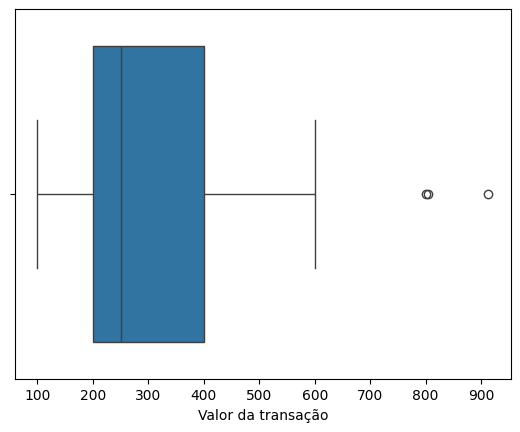

In [ ]:

#Visualizando os outliers

import seaborn as sns

sns.boxplot(x=df['Valor da transação'])